# Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Dataset from kaggle

In [ ]:
#import file
df1 = pd.read_csv("dataset_kaggle.csv",encoding = "latin-1")

In [ ]:
#information of data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#drop column all Unnamed
df1.drop(df1.iloc[:,2:],inplace=True,axis=1)

In [ ]:
#rename columns
df1.rename(columns={"v1": "label", "v2": "sms"},inplace=True)

In [ ]:
 # see the first 5 data
df1.head(5)

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#count the number of missing values
df1.isna().sum()

label    0
sms      0
dtype: int64

In [ ]:
#show counts of spam sms and not spam sms (ham)
print('The total number of spam and not spam message in our dataset is\n',df1['label'].value_counts())

The total number of spam and not spam message in our dataset is
 label
ham     4825
spam     747
Name: count, dtype: int64


In [ ]:
#number of rows and columns in the DataFrame.
df1.shape

(5572, 2)

In [ ]:
#check duplicate value
df1.duplicated().sum()

403

In [ ]:
#drop duplicate value
df1=df1.drop_duplicates()

In [ ]:
print('The total number of spam and not spam message in our dataset is\n',df1['label'].value_counts())

The total number of spam and not spam message in our dataset is
 label
ham     4516
spam     653
Name: count, dtype: int64


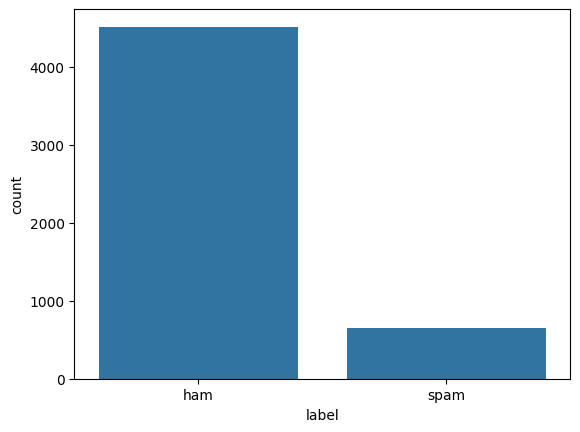

In [ ]:
# create a bar plot of the counts of each unique value in the 'label' column
sns.countplot(x=df1['label'])
plt.show()

In [ ]:
df1

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


- Dataset from research

In [ ]:
#import file
df2 = pd.read_csv("dataset_research.csv",encoding = "latin-1")

In [ ]:
#combines file
df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
df

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
6279,spam,You have won a Nokia 7250i. This is what you g...
6280,spam,Get ur 1st RINGTONE FREE NOW! Reply to this ms...
6281,spam,Ur cash-balance is currently 500 pounds - to m...
6282,spam,Records indicate you were involved in an accid...


In [ ]:
print('The total number of spam and not spam message in our dataset is\n',df['label'].value_counts())

The total number of spam and not spam message in our dataset is
 label
ham     4516
spam    1768
Name: count, dtype: int64


In [ ]:
df.duplicated().sum()

359

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
print('The total number of spam and not spam message in our dataset is\n',df['label'].value_counts())

The total number of spam and not spam message in our dataset is
 label
ham     4516
spam    1409
Name: count, dtype: int64


# Data Preprocessing

In [ ]:
pip install nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 6.3 MB/s eta 0:00:00


In [ ]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 20.2 MB/s eta 0:00:00


In [ ]:
import nltk
import re
import nlpaug.augmenter.word as naw
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from sklearn.utils import resample

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#maps the values in the 'label' column of a DataFrame  from the original string values 'spam' and 'ham' to numerical values 1 and 0
df['label'] = df['label'].map( {'spam': 1, 'ham': 0})

<ipython-input-26-2face8f9e4ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map( {'spam': 1, 'ham': 0})


In [ ]:
df

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
6274,1,Your SAM registration has been received! Click...
6279,1,You have won a Nokia 7250i. This is what you g...
6280,1,Get ur 1st RINGTONE FREE NOW! Reply to this ms...
6282,1,Records indicate you were involved in an accid...


In [ ]:
# Copy the 'sms' column to the 'change_sms' column
df['change_sms'] = df['sms'].copy()

# Remove leading and trailing whitespaces from the 'change_sms' column
df['change_sms'] = df['change_sms'].str.strip()

# Convert all characters in the 'change_sms' column to lowercase
df['change_sms'] = df['change_sms'].str.lower()

# Expand contractions
df['change_sms'] = df['change_sms'].apply(lambda x: contractions.fix(x))


<ipython-input-28-659813654961>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change_sms'] = df['sms'].copy()
<ipython-input-28-659813654961>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change_sms'] = df['change_sms'].str.strip()
<ipython-input-28-659813654961>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [ ]:
df

,label,sms,change_sms
0,0,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,0,Ok lar... Joking wif u oni...,ok lar... joking wif you oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,you dun say so early hor... you c already then...
4,0,"Nah I don't think he goes to usf, he lives aro...","nah i do not think he goes to usf, he lives ar..."
...,...,...,...
6274,1,Your SAM registration has been received! Click...,your sam registration has been received! click...
6279,1,You have won a Nokia 7250i. This is what you g...,you have won a nokia 7250i. this is what you g...
6280,1,Get ur 1st RINGTONE FREE NOW! Reply to this ms...,get you are 1st ringtone free now! reply to th...
6282,1,Records indicate you were involved in an accid...,records indicate you were involved in an accid...


In [ ]:
def change_word_eng(sms):
    regex = r"(http(s)?:\/\/.)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)"
    sms = re.sub(regex, ' link ', sms)
    sms= re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b',' email ',sms)
    sms = re.sub(r'\b(?:\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\d{10})\b', ' phonenumber ', sms)
    sms = re.sub(r'\b(?:\d{3}[-\.\s]??\d{7})\b', ' phonenumber ', sms)
    sms = re.sub(r'\b(?:\d{2}[-\.\s]??\d{3}[-\.\s]??\d{4}|\d{9})\b', ' phonenumber ', sms)
    sms = re.sub(r'\b\d{10}\b', ' phonenumber ', sms)
    sms = re.sub(r'\b\d{9}\b', ' phonenumber ', sms)
    sms = re.sub(r'\d+', ' number ', sms)
    sms = re.sub(r'[£$฿]', ' moneysymbol ', sms)
    sms = re.sub(r'[\"]', ' ', sms)
    sms = re.sub(r'[^a-zA-Z\s\'\"]|^\'|\'$', '', sms)
    return sms


# Create a new column 'change_sms' by applying the function to 'sms' column
df['change_sms'] = df['change_sms'].apply(lambda x: change_word_eng(x))



<ipython-input-30-50d0c943b1b2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change_sms'] = df['change_sms'].apply(lambda x: change_word_eng(x))


In [ ]:
df

,label,sms,change_sms
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif you oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in number a wkly comp to win fa c...
3,0,U dun say so early hor... U c already then say...,you dun say so early hor you c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i do not think he goes to usf he lives aro...
...,...,...,...
6274,1,Your SAM registration has been received! Click...,your sam registration has been received click ...
6279,1,You have won a Nokia 7250i. This is what you g...,you have won a nokia number i this is what yo...
6280,1,Get ur 1st RINGTONE FREE NOW! Reply to this ms...,get you are number st ringtone free now reply...
6282,1,Records indicate you were involved in an accid...,records indicate you were involved in an accid...


In [ ]:
# Remove punctuation
df['change_sms'] = df['change_sms'].apply(lambda x: re.sub(r'[^\w\d\s]|_\s*$', ' ', x))

# Remove whitespace between terms with single space
df['change_sms'] = df['change_sms'].apply(lambda x: re.sub(r'\s+', ' ', x))

<ipython-input-32-699dc787d415>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change_sms'] = df['change_sms'].apply(lambda x: re.sub(r'[^\w\d\s]|_\s*$', ' ', x))
<ipython-input-32-699dc787d415>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['change_sms'] = df['change_sms'].apply(lambda x: re.sub(r'\s+', ' ', x))


In [ ]:
#function for tokenize
def tokenize(df , model) :
  new_values = []
  for i in df.index:
    if model == "nltk":
      s = word_tokenize(df['change_sms'][i])
    new_values.append(s)
  df[model] = new_values
  return df

In [ ]:
#tokenize the text in a DataFrame using NLTK
tokenize(df , "nltk")

<ipython-input-33-b4ec36622400>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[model] = new_values


,label,sms,change_sms,nltk
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,0,Ok lar... Joking wif u oni...,ok lar joking wif you oni,"[ok, lar, joking, wif, you, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in number a wkly comp to win fa cup...,"[free, entry, in, number, a, wkly, comp, to, w..."
3,0,U dun say so early hor... U c already then say...,you dun say so early hor you c already then say,"[you, dun, say, so, early, hor, you, c, alread..."
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i do not think he goes to usf he lives aro...,"[nah, i, do, not, think, he, goes, to, usf, he..."
...,...,...,...,...
6274,1,Your SAM registration has been received! Click...,your sam registration has been received click ...,"[your, sam, registration, has, been, received,..."
6279,1,You have won a Nokia 7250i. This is what you g...,you have won a nokia number i this is what you...,"[you, have, won, a, nokia, number, i, this, is..."
6280,1,Get ur 1st RINGTONE FREE NOW! Reply to this ms...,get you are number st ringtone free now reply ...,"[get, you, are, number, st, ringtone, free, no..."
6282,1,Records indicate you were involved in an accid...,records indicate you were involved in an accid...,"[records, indicate, you, were, involved, in, a..."


In [ ]:
# Initialize the lemmatizer
wl = WordNetLemmatizer()

#function to map POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V') or tag in ['MD']:
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

#lemmatizer function
def lemmatizer(df):
    new_values = []
    for i in df.index:
        word_pos_tags = nltk.pos_tag(df['nltk'][i]) # Get position tags
        a = [wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
        new_values.append(a)
    df['nltk'] = new_values
    return df



In [ ]:
# Lemmatize the 'nltk' column using the lemmatizer function
df['nltk'] = lemmatizer(df[['nltk']])

# Join the lemmatized tokens back into a single string in each row of the 'nltk' column
df['nltk'] = df['nltk'].apply(' '.join)

<ipython-input-35-29701191be3c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nltk'] = new_values
<ipython-input-36-1a544be00279>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nltk'] = lemmatizer(df[['nltk']])
<ipython-input-36-1a544be00279>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [ ]:
df

,label,sms,change_sms,nltk
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif you oni,ok lar joking wif you oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in number a wkly comp to win fa cup...,free entry in number a wkly comp to win fa cup...
3,0,U dun say so early hor... U c already then say...,you dun say so early hor you c already then say,you dun say so early hor you c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i do not think he goes to usf he lives aro...,nah i do not think he go to usf he live around...
...,...,...,...,...
6274,1,Your SAM registration has been received! Click...,your sam registration has been received click ...,your sam registration have be receive click he...
6279,1,You have won a Nokia 7250i. This is what you g...,you have won a nokia number i this is what you...,you have win a nokia number i this be what you...
6280,1,Get ur 1st RINGTONE FREE NOW! Reply to this ms...,get you are number st ringtone free now reply ...,get you be number st ringtone free now reply t...
6282,1,Records indicate you were involved in an accid...,records indicate you were involved in an accid...,record indicate you be involve in an accident ...


In [ ]:
# Stopwords
stop_words = set(stopwords.words('english'))
df['nltk'] = df['nltk'].apply(lambda x: ' '.join(['' if word.lower().strip() in stop_words else word for word in x.split()]))

# Stemming
ss = SnowballStemmer("english")
df['nltk'] = df['nltk'].apply(lambda x: ' '.join([ss.stem(term) for term in x.split()]))

# Delete whitespace
df['nltk'] = df['nltk'].apply(lambda x: ' '.join(word.strip() for word in x.split() if word.strip()))


<ipython-input-38-725644f2dee2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nltk'] = df['nltk'].apply(lambda x: ' '.join(['' if word.lower().strip() in stop_words else word for word in x.split()]))
<ipython-input-38-725644f2dee2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nltk'] = df['nltk'].apply(lambda x: ' '.join([ss.stem(term) for term in x.split()]))
<ipython-input-38-725644f2dee2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [ ]:
df

,label,sms,change_sms,nltk
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif you oni,ok lar joke wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in number a wkly comp to win fa cup...,free entri number wkli comp win fa cup final t...
3,0,U dun say so early hor... U c already then say...,you dun say so early hor you c already then say,dun say earli hor c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i do not think he goes to usf he lives aro...,nah think go usf live around though
...,...,...,...,...
6274,1,Your SAM registration has been received! Click...,your sam registration has been received click ...,sam registr receiv click complet process http ...
6279,1,You have won a Nokia 7250i. This is what you g...,you have won a nokia number i this is what you...,win nokia number get win free auction take par...
6280,1,Get ur 1st RINGTONE FREE NOW! Reply to this ms...,get you are number st ringtone free now reply ...,get number st rington free repli messag tone g...
6282,1,Records indicate you were involved in an accid...,records indicate you were involved in an accid...,record indic involv accid last number number y...


In [ ]:
df['nltk'].duplicated().sum()

536

In [ ]:
print('The total number of spam and not spam message in our dataset is\n',df['label'].value_counts())

The total number of spam and not spam message in our dataset is
 label
0    4469
1     920
Name: count, dtype: int64


In [ ]:
df.drop_duplicates(subset=['nltk'], keep='first', inplace=True)

<ipython-input-42-5a73740f885e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['nltk'], keep='first', inplace=True)


In [ ]:
df['nltk'].duplicated().sum()

0

In [ ]:
print('The total number of spam and not spam message in our dataset is\n',df['label'].value_counts())

The total number of spam and not spam message in our dataset is
 label
0    4469
1     920
Name: count, dtype: int64


In [ ]:
df

,label,sms,change_sms,nltk
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif you oni,ok lar joke wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in number a wkly comp to win fa cup...,free entri number wkli comp win fa cup final t...
3,0,U dun say so early hor... U c already then say...,you dun say so early hor you c already then say,dun say earli hor c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i do not think he goes to usf he lives aro...,nah think go usf live around though
...,...,...,...,...
6273,1,Double Mins & Double Txt & 1/2 price Call Mobi...,double mins double txt number number price cal...,doubl min doubl txt number number price call m...
6274,1,Your SAM registration has been received! Click...,your sam registration has been received click ...,sam registr receiv click complet process http ...
6279,1,You have won a Nokia 7250i. This is what you g...,you have won a nokia number i this is what you...,win nokia number get win free auction take par...
6282,1,Records indicate you were involved in an accid...,records indicate you were involved in an accid...,record indic involv accid last number number y...


- Data Augmentation

In [ ]:
stop_words = set(stopwords.words('english'))

# Separate spam and ham messages
spam_messages = df[df['label'] == 1]['nltk']
ham_messages = df[df['label'] == 0]['nltk']

# Upsample the spam class using text augmentation with synonym replacement
aug = naw.SynonymAug(aug_src='wordnet', stopwords=stop_words)

num_to_generate = len(ham_messages) - len(spam_messages)

generated_messages = set()  # Archive newly created messages to check for duplicates

for original_message in spam_messages:
    while len(generated_messages) < num_to_generate:
        # Apply synonym replacement augmentation
        augmented_message = aug.augment(original_message)

        # Make sure not replaced
        augmented_message = re.sub(r'\blink\b', 'link', str(augmented_message))
        augmented_message = re.sub(r'\bphonenumber\b', 'phonenumber', str(augmented_message))
        augmented_message = re.sub(r'\bnumber\b', 'number', str(augmented_message))
        augmented_message = re.sub(r'\bemail\b', 'email', str(augmented_message))
        augmented_message = re.sub(r'\bmoneysymbol\b', 'moneysymbol', str(augmented_message))
        # Remove square brackets, single quotes, and double quotes
        augmented_message = re.sub(r'[\[\]\'"]', '', augmented_message)

        if augmented_message not in generated_messages and augmented_message not in spam_messages:
            generated_messages.add(augmented_message)

# Create a new DataFrame with the original spam messages and the augmented ones
augmented_df = pd.DataFrame({'nltk': list(generated_messages), 'label': 1})



In [ ]:
augmented_df

,nltk,label
0,liberal entri number wkli comp win fa cup fina...,1
1,complimentary entri identification number wkli...,1
2,free entri number wkli comp win fa cup final t...,1
3,liberal entri number wkli comp win fa cup fina...,1
4,free entri number wkli comp win fa cup final t...,1
...,...,...
3544,spare entri number wkli comp win fa cup final ...,1
3545,free entri issue wkli comp bring home the baco...,1
3546,free entri number wkli comp win fa cup net tkt...,1
3547,liberal entri number wkli comp advance fa cup ...,1


In [ ]:
augmented_df['nltk'].duplicated().sum()

0

In [ ]:
# Concatenate the original DataFrame and the augmented DataFrame
df = pd.concat([df, augmented_df], ignore_index=True)

In [ ]:
df

,label,sms,change_sms,nltk
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif you oni,ok lar joke wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in number a wkly comp to win fa cup...,free entri number wkli comp win fa cup final t...
3,0,U dun say so early hor... U c already then say...,you dun say so early hor you c already then say,dun say earli hor c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i do not think he goes to usf he lives aro...,nah think go usf live around though
...,...,...,...,...
8933,1,NaN,NaN,spare entri number wkli comp win fa cup final ...
8934,1,NaN,NaN,free entri issue wkli comp bring home the baco...
8935,1,NaN,NaN,free entri number wkli comp win fa cup net tkt...
8936,1,NaN,NaN,liberal entri number wkli comp advance fa cup ...


In [ ]:
# Shuffle the DataFrame
balanced_df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
balanced_df

,label,sms,change_sms,nltk
0,1,NaN,NaN,free entri number wkli comp win fa cup last tk...
1,0,Oh wow thats gay. Will firmware update help,oh wow that is gay will firmware update help,oh wow gay firmwar updat help
2,1,NaN,NaN,free entri number wkli comp deliver the goods ...
3,1,NaN,NaN,destitute entri number wkli comp win fa cup fi...
4,1,NaN,NaN,free entri figure wkli comp win fa cup final t...
...,...,...,...,...
8933,1,NaN,NaN,barren entri identification number wkli comp w...
8934,1,You won't believe it but it's true. It's Incre...,you will not believe it but it is true it is i...,believ true incred txts repli g learn truli am...
8935,1,NaN,NaN,complimentary entri identification number wkli...
8936,0,"see, i knew giving you a break a few times wou...",see i knew giving you a break a few times woul...,see knew give break time woul lead alway want ...


In [ ]:
balanced_df['label'].value_counts()

label
1    4469
0    4469
Name: count, dtype: int64

In [ ]:
balanced_df['nltk'].duplicated().sum()

1

In [ ]:
duplicated_rows = balanced_df.loc[balanced_df['nltk'].duplicated(), :]
print(duplicated_rows)


      label                                                sms  \
7362      1  Free entry in 2 a wkly comp to win FA Cup fina...   

                                             change_sms  \
7362  free entry in number a wkly comp to win fa cup...   

                                                   nltk  
7362  free entri number wkli comp win fa cup final t...  


In [ ]:
# remove duplicated messages
balanced_df.drop_duplicates(subset=['nltk'], inplace=True)


In [ ]:
balanced_df['label'].value_counts()

label
0    4469
1    4468
Name: count, dtype: int64

- Downsampling

In [ ]:
# Split the data into 'label 0' and 'label 1' groups
label_0 = balanced_df[balanced_df['label'] == 0]
label_1 = balanced_df[balanced_df['label'] == 1]

# Downsample 'label 0' to match the number of samples in 'label 1'
downsampled_label_0 = resample(label_0, replace=False, n_samples=len(label_1), random_state=42)

# Concatenate the downsampled 'label 0' with 'label 1'
downsampled_df = pd.concat([downsampled_label_0, label_1])

# Shuffle the new DataFrame
downsampled_df = downsampled_df.sample(frac=1, random_state=42).reset_index(drop=True)



In [ ]:
downsampled_df

,label,sms,change_sms,nltk
0,0,What is important is that you prevent dehydrat...,what is important is that you prevent dehydrat...,import prevent dehydr give enough fluid
1,1,NaN,NaN,complimentary entri number wkli comp win fa cu...
2,0,Go where n buy? Juz buy when we get there lar.,go where n buy juz buy when we get there lar,go n buy juz buy get lar
3,1,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,free for number st week no number nokia tone n...,free number st week number nokia tone number m...
4,1,NaN,NaN,free entri issue wkli comp win fa cup last tkt...
...,...,...,...,...
8931,1,"Dear Voucher Holder, To claim this weeks offer...",dear voucher holder to claim this weeks offer ...,dear voucher holder claim week offer pc pleas ...
8932,1,NaN,NaN,free entri telephone number wkli comp bring ho...
8933,1,NaN,NaN,free entri number wkli comp win fa cup last tk...
8934,0,Lol ok your forgiven :),lol ok your forgiven,lol ok forgiven


In [ ]:
downsampled_df['label'].value_counts()

label
0    4468
1    4468
Name: count, dtype: int64

In [ ]:
downsampled_df['nltk'].duplicated().sum()

0

In [ ]:
# Select the row index for processing
n = 1

# Split the text into words
words = downsampled_df['nltk'][n].split()

# Count the number of words
word_count = len(words)

# Print the original text, word count, and the list of words
print("sms: ", downsampled_df['nltk'][n])
print("\ncount: ", word_count)
print("nltk: ", words)


sms:  complimentary entri number wkli comp win fa cup final tkts number st crataegus oxycantha number text fa number receiv entri questionstd txt ratetc appli number number

count:  26
nltk:  ['complimentary', 'entri', 'number', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'number', 'st', 'crataegus', 'oxycantha', 'number', 'text', 'fa', 'number', 'receiv', 'entri', 'questionstd', 'txt', 'ratetc', 'appli', 'number', 'number']


In [ ]:
# Calculate the number of words in each text
downsampled_df['num_words'] = downsampled_df['nltk'].apply(lambda x: len(x.split()))

# Find the row with the maximum number of words
max_words_row = downsampled_df.loc[downsampled_df['num_words'].idxmax()]

# Print the text in the row with the maximum number of words
print("Text in the row with the maximum number of words:")
print(max_words_row['nltk'])

# Print the number of words in the row with the maximum number of words
print("Number of words in the row with the maximum number of words:", max_words_row['num_words'])

# Store the maximum number of words for further use
max_len = max_words_row['num_words']


Text in the row with the maximum number of words:
love start attractioni feel need everi time around link first thing come thoughtsi would start day end link everi time link everi breath link life happen around link life name heri would cri link give happi take sorrowsi readi fight anyon heri love crazi thing link proov anyon girl beauti ladi whole planeti alway sing prais link start make chicken curri end maki link beauti link get everi morn thank god day mei would like say link tell later
Number of words in the row with the maximum number of words: 79


In [ ]:
print(max_len)

79


In [ ]:
downsampled_df

,label,sms,change_sms,nltk,num_words
0,0,What is important is that you prevent dehydrat...,what is important is that you prevent dehydrat...,import prevent dehydr give enough fluid,6
1,1,NaN,NaN,complimentary entri number wkli comp win fa cu...,26
2,0,Go where n buy? Juz buy when we get there lar.,go where n buy juz buy when we get there lar,go n buy juz buy get lar,7
3,1,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,free for number st week no number nokia tone n...,free number st week number nokia tone number m...,19
4,1,NaN,NaN,free entri issue wkli comp win fa cup last tkt...,25
...,...,...,...,...,...
8931,1,"Dear Voucher Holder, To claim this weeks offer...",dear voucher holder to claim this weeks offer ...,dear voucher holder claim week offer pc pleas ...,17
8932,1,NaN,NaN,free entri telephone number wkli comp bring ho...,29
8933,1,NaN,NaN,free entri number wkli comp win fa cup last tk...,25
8934,0,Lol ok your forgiven :),lol ok your forgiven,lol ok forgiven,3


- Import file of final dataset

In [ ]:
downsampled_df.to_csv('nlp_finaldata.csv', index=False, encoding='utf-8-sig')

In [2]:
# Load file
final_df_path = "nlp_finaldata.csv"
final_df = pd.read_csv(final_df_path)

In [3]:
import _utils as fn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import Embedding, Dense,Dropout,Flatten,Bidirectional, LSTM, SimpleRNN, Conv1D, MaxPooling1D,GlobalMaxPooling1D
from keras.layers import GRU
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping

In [4]:
final_df['nltk'][1]

'complimentary entri number wkli comp win fa cup final tkts number st crataegus oxycantha number text fa number receiv entri questionstd txt ratetc appli number number'

- Word Embedding โดยใช้ Embedding Layer แบบทั่วไป

In [7]:
print("max_len: ", max_len)

max_len:  79


In [8]:
embedding_dim=max_len

In [9]:
#Splitting the data into dependent and independent variables i.e, features and the target columns
X = final_df['nltk']
Y =  final_df['label']

#Splitting the data such that 20% will be used for testing and the remaining 82% will be used for training.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [10]:
len(X_train),len(Y_train),len(X_test),len(Y_test)

(7148, 7148, 1788, 1788)

In [11]:
X_train = [str(text) if pd.notnull(text) else '' for text in X_train]

# Creating a Tokenizer and fitting it on the cleaned text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Defining special tokens and updating the tokenizer's word index
special_vocab = {'<PAD>': 0, '<START>': 1, '<UNKNOWN>': 2, '<UNUSED>': 3}
tokenizer.word_index = {**special_vocab, **{word: index + 3 for word, index in tokenizer.word_index.items()}}

In [12]:
tokenizer.word_index

{'<PAD>': 0,
 '<START>': 1,
 '<UNKNOWN>': 2,
 '<UNUSED>': 3,
 'number': 4,
 'entri': 5,
 'fa': 6,
 'text': 7,
 'txt': 8,
 'st': 9,
 'receiv': 10,
 'appli': 11,
 'wkli': 12,
 'comp': 13,
 'cup': 14,
 'tkts': 15,
 'questionstd': 16,
 'ratetc': 17,
 'free': 18,
 'win': 19,
 'final': 20,
 'may': 21,
 'phone': 22,
 'get': 23,
 'identification': 24,
 'bit': 25,
 'numeral': 26,
 'act': 27,
 'routine': 28,
 'turn': 29,
 'issue': 30,
 'figure': 31,
 'telephone': 32,
 'last': 33,
 'link': 34,
 'call': 35,
 'go': 36,
 'crataegus': 37,
 'come': 38,
 'moneysymbol': 39,
 'english': 40,
 'hawthorn': 41,
 'gain': 42,
 'whitethorn': 43,
 'know': 44,
 'want': 45,
 'oxycantha': 46,
 'laevigata': 47,
 'make': 48,
 'home': 49,
 'ltgt': 50,
 'love': 51,
 'send': 52,
 'ok': 53,
 'day': 54,
 'good': 55,
 'like': 56,
 'time': 57,
 'ahead': 58,
 'think': 59,
 'concluding': 60,
 'the': 61,
 'need': 62,
 'terminal': 63,
 'say': 64,
 'tell': 65,
 'take': 66,
 'net': 67,
 'messag': 68,
 'see': 69,
 'week': 70,
 'on

In [13]:
vocab_size = len(tokenizer.word_index)+1
print("vocab_size: ",vocab_size)

vocab_size:  5964


In [14]:
X_train = [[1] + [tokenizer.word_index.get(word, 2) for word in sentence.split()] for sentence in X_train]
X_test = [[1] + [tokenizer.word_index.get(word, 2) for word in sentence.split()] for sentence in X_test]

In [15]:
# Pad sequences in X_train and X_test directly
x_train = pad_sequences(X_train, maxlen=max_len)
x_test = pad_sequences(X_test, maxlen=max_len)


In [16]:
# Get all the words in the model
word_index = tokenizer.word_index
vocab = [word for word, idx in word_index.items()]

# Create a file text_classification_vocab.txt
with open('nlp_emm_text_classification_vocab.txt', 'w') as f:
    for i, word in enumerate(vocab):
        f.write(f"{word} {i}\n")


- Data for test

In [ ]:
# Load file

data_test = pd.read_csv('dataeng_text.csv')


In [ ]:
# Copy the 'sms' column to the 'change_sms' column
data_test['change_sms'] = data_test['sms'].copy()
# Remove leading and trailing whitespaces from the 'change_sms' column
data_test['change_sms'] = data_test['change_sms'].str.strip()
# Convert all characters in the 'change_sms' column to lowercase
data_test['change_sms'] = data_test['change_sms'].str.lower()
# Expand contractions
data_test['change_sms'] = data_test['change_sms'].apply(lambda x: contractions.fix(x))
# Create a new column 'change_sms' by applying the function to 'sms' column
data_test['change_sms'] = data_test['change_sms'].apply(lambda x: change_word_eng(x))
# Remove punctuation
data_test['change_sms'] = data_test['change_sms'].apply(lambda x: re.sub(r'[^\w\d\s]|_\s*$', ' ', x))
# Remove whitespace between terms with single space
data_test['change_sms'] = data_test['change_sms'].apply(lambda x: re.sub(r'\s+', ' ', x))
#tokenize the text in a DataFrame using NLTK
tokenize(data_test , "nltk")
# Lemmatize the 'nltk' column using the lemmatizer function
data_test['nltk'] = lemmatizer(data_test[['nltk']])
# Join the lemmatized tokens back into a single string in each row of the 'nltk' column
data_test['nltk'] = data_test['nltk'].apply(' '.join)
# Stopwords
stop_words = set(stopwords.words('english'))
data_test['nltk'] =data_test['nltk'].apply(lambda x: ' '.join(['' if word.lower().strip() in stop_words else word for word in x.split()]))
# Stemming
ss = SnowballStemmer("english")
data_test['nltk'] = data_test['nltk'].apply(lambda x: ' '.join([ss.stem(term) for term in x.split()]))
# Delete whitespace
data_test['nltk'] = data_test['nltk'].apply(lambda x: ' '.join(word.strip() for word in x.split() if word.strip()))



<ipython-input-29-29701191be3c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nltk'] = new_values


In [ ]:
data_test

,Unnamed: 0,sms,label,change_sms,nltk
0,0,Beachwaver used their browse and cart abandonm...,0,beachwaver used their browse and cart abandonm...,beachwav use brows cart abandon remind boost e...
1,1,Since many people eagerly await Memorial Day s...,0,since many people eagerly await memorial day s...,sinc mani peopl eager await memori day sale sh...
2,2,Purity Coffee gave their audience a special Mo...,0,purity coffee gave their audience a special mo...,puriti coffe give audienc special mother day t...
3,3,To make the most of increased website traffic ...,0,to make the most of increased website traffic ...,make increas websit traffic around memori day ...
4,4,Thank you for being a valued customer! As a to...,0,thank you for being a valued customer as a tok...,thank valu custom token appreci offer discount...
5,5,You received 3.41 Bitcoin (BTC). To confirm yo...,1,you received number number bitcoin btc to conf...,receiv number number bitcoin btc confirm trans...
6,6,"Hi, this is Cynde from HR. We have a couple qu...",1,hi this is cynde from hr we have a couple ques...,hi cynd hr coupl question regard applic pleas ...
7,7,We’ve detected suspicious activity on your Goo...,1,we have detected suspicious activity on your g...,detect suspici activ googl account follow link...
8,8,"Your niece has been arrested and needs $7,500",1,your niece has been arrested and needs moneysy...,niec arrest need moneysymbol number number
9,9,Thank you for being a valued customer! As a to...,1,thank you for being a valued customer as a tok...,thank valu custom token appreci offer discount...


In [ ]:
# Convert text data in X_train to sequences of integers and pad them to maxlen
datatest = [[1] + [tokenizer.word_index.get(word, 2) for word in sentence.split()] for sentence in data_test['nltk']]
datatest = pad_sequences(datatest , maxlen=max_len)
labeltest = data_test['label'].values

- Early stopping of model

In [17]:
#callback
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
]

# LSTM

- Model Training

In [ ]:
lstm_emm = Sequential()
lstm_emm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
lstm_emm.add(LSTM(32, return_sequences=True))
lstm_emm.add(Dropout(0.5))
lstm_emm.add(LSTM(32))
lstm_emm.add(Dropout(0.5))
lstm_emm.add(Dense(32, activation='relu'))
lstm_emm.add(Dropout(0.5))
lstm_emm.add(Dense(1, activation='sigmoid'))

lstm_emm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
lstm_emm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 79, 79)            471156    
                                                                 
 lstm (LSTM)                 (None, 79, 32)            14336     
                                                                 
 dropout (Dropout)           (None, 79, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [ ]:
# Train the models
history_lstm_emm =lstm_emm.fit(x_train, Y_train, epochs=20, batch_size=32,validation_data=(x_test, Y_test), callbacks=callbacks)

Epoch 1/20
224/224 [==============================] - 26s 90ms/step - loss: 0.1651 - acc: 0.9527 - val_loss: 0.0506 - val_acc: 0.9849
Epoch 2/20
224/224 [==============================] - 18s 79ms/step - loss: 0.0297 - acc: 0.9930 - val_loss: 0.0551 - val_acc: 0.9871
Epoch 3/20
224/224 [==============================] - 18s 79ms/step - loss: 0.0129 - acc: 0.9968 - val_loss: 0.0696 - val_acc: 0.9849
Epoch 4/20
224/224 [==============================] - 22s 99ms/step - loss: 0.0054 - acc: 0.9987 - val_loss: 0.0642 - val_acc: 0.9849
Epoch 4: early stopping


- Model Evaluation

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = lstm_emm.evaluate(x_test, Y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')
print(f'Test loss: {test_loss * 100:.2f}%')

56/56 [==============================] - 1s 18ms/step - loss: 0.0506 - acc: 0.9849
Test accuracy: 98.49%
Test loss: 5.06%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
lstm_emm.evaluate(x_test, Y_test)

y_pred1 = lstm_emm.predict(x_test)
y_pred_binary1 = (y_pred1 > 0.5).astype(int)

conf_matrix1 = confusion_matrix(Y_test, y_pred_binary1)
print("Confusion Matrix:")
print(conf_matrix1)

classification_rep1 = classification_report(Y_test, y_pred_binary1)
print("Classification Report:")
print(classification_rep1)

56/56 [==============================] - 2s 16ms/step
Confusion Matrix:
[[914   4]
 [ 23 847]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       918
           1       1.00      0.97      0.98       870

    accuracy                           0.98      1788
   macro avg       0.99      0.98      0.98      1788
weighted avg       0.99      0.98      0.98      1788



Last train accuracy: 0.9987409114837646
Last validation accuracy: 0.9848993420600891


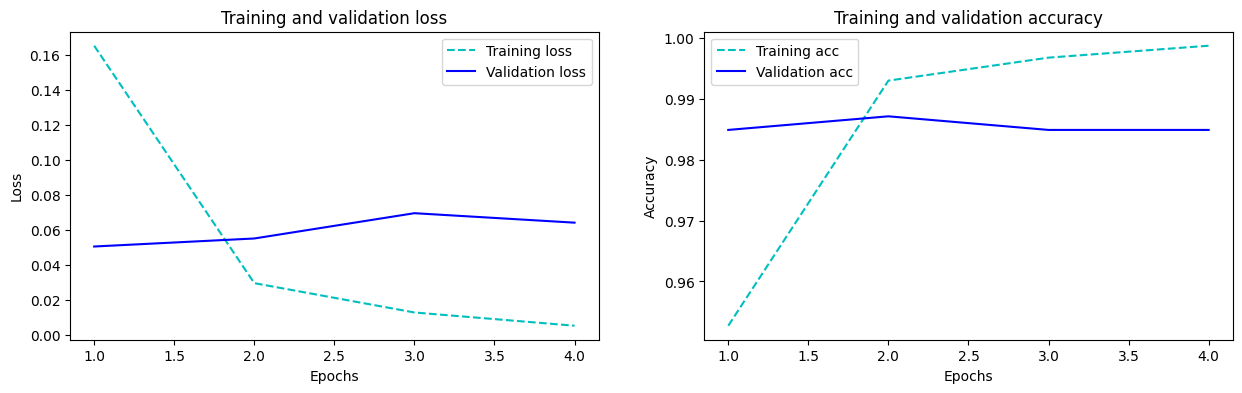

In [ ]:
fn.show_result(history_lstm_emm)

In [ ]:
lstm_emm.inputs[0]

<KerasTensor: shape=(None, 79) dtype=float32 (created by layer 'embedding_input')>

In [ ]:
lstm_emm.outputs[0]

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>

- Convert tflite model

In [ ]:
run_model = tf.function(lambda x: lstm_emm(x))
# This is important, let's fix the input size.
BATCH_SIZE = 1
STEPS =79

concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE,STEPS], lstm_emm.inputs[0].dtype))


# model directory.
MODEL_DIR = "keras_lstm"
lstm_emm.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
tflite_model = converter.convert()
# Save the TensorFlow Lite model to a file
file = open('nlp_lstm_emm.tflite', 'wb')
file.write(tflite_model)
file.close()



In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='nlp_lstm_emm.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)

Input details: [{'name': 'serving_default_x:0', 'index': 0, 'shape': array([ 1, 79], dtype=int32), 'shape_signature': array([ 1, 79], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall:0', 'index': 44, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([1, 1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


- Check the saved Tflite model to see if it works efficiently

In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='nlp_lstm_emm.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


from sklearn.metrics import accuracy_score

# Initialize an empty list to store the predictions
predictions = []

# Iterate over each sample in the test dataset
for i in range(len(datatest)):
    # Get the input sequence for the current sample and convert it to FLOAT32
    input_sequence_float32 = datatest[i].reshape(1, -1).astype(np.float32)

    # Perform inference
    interpreter.set_tensor(input_details[0]['index'], input_sequence_float32)
    interpreter.invoke()

    # Get the output
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Convert output to binary prediction
    binary_prediction = (output_data > 0.5).astype(int)

    # Append the prediction to the list
    predictions.append(binary_prediction[0])

# accuracy for test data
accuracy1 = accuracy_score(labeltest, predictions)

# Print the accuracy for test data
print("Accuracy :", accuracy1)


Accuracy : 0.5


In [ ]:
# Display the predictions for each text
for i in range(len(data_test)):
    print("Text:", data_test['nltk'][i])
    print("True Label:", labeltest[i])
    print("Predicted Label:", predictions[i])
    print()


Text: beachwav use brows cart abandon remind boost engag revenu memori day sale strateg updat messag highlight final day get number entir site simpl yet effect chang emphas limitedtim natur offer creat great sens urgenc custom shop immedi take advantag deal expir
True Label: 0
Predicted Label: [0]

Text: sinc mani peopl eager await memori day sale shop summer cloth normal brand invit custom check late arriv ahead long holiday weekend messag come perfect time anyon consid buy new outfit annual barbecu outdoor gather come
True Label: 0
Predicted Label: [0]

Text: puriti coffe give audienc special mother day treat number sitewid plus free ship brand first announc sale sm earli may ensur peopl plenti time order continu promot midnight mother day send mix email sms remind send throughout sale period keep engag convers high
True Label: 0
Predicted Label: [0]

Text: make increas websit traffic around memori day dw home launch custom signup unit teas upcom offer captur new subscrib incentiv op

# RNN


- Model Training

In [ ]:
rnn_emm = Sequential()
rnn_emm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
rnn_emm.add(SimpleRNN(32, return_sequences=True))
rnn_emm.add(Dropout(0.5))
rnn_emm.add(SimpleRNN(32))
rnn_emm.add(Dropout(0.5))
rnn_emm.add(Dense(32, activation='relu'))
rnn_emm.add(Dropout(0.5))
rnn_emm.add(Dense(units=1, activation='sigmoid'))
rnn_emm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
rnn_emm.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 79, 79)            471156    
                                                                 
 simple_rnn (SimpleRNN)      (None, 79, 32)            3584      
                                                                 
 dropout_3 (Dropout)         (None, 79, 32)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [ ]:
# Train the models
history_rnn_emm = rnn_emm.fit(x_train, Y_train, epochs=20, batch_size=32,validation_data=(x_test, Y_test), callbacks=callbacks)

Epoch 1/20
224/224 [==============================] - 13s 44ms/step - loss: 0.2145 - acc: 0.9121 - val_loss: 0.0612 - val_acc: 0.9810
Epoch 2/20
224/224 [==============================] - 11s 50ms/step - loss: 0.0425 - acc: 0.9902 - val_loss: 0.0667 - val_acc: 0.9843
Epoch 3/20
224/224 [==============================] - 11s 51ms/step - loss: 0.0163 - acc: 0.9968 - val_loss: 0.0763 - val_acc: 0.9810
Epoch 4/20
224/224 [==============================] - 11s 49ms/step - loss: 0.0094 - acc: 0.9985 - val_loss: 0.0821 - val_acc: 0.9815
Epoch 4: early stopping


- Model Evaluation

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = rnn_emm.evaluate(x_test, Y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')
print(f'Test loss: {test_loss * 100:.2f}%')

56/56 [==============================] - 1s 11ms/step - loss: 0.0612 - acc: 0.9810
Test accuracy: 98.10%
Test loss: 6.12%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
rnn_emm.evaluate(x_test, Y_test)

y_pred2 = rnn_emm.predict(x_test)
y_pred_binary2 = (y_pred2> 0.5).astype(int)

conf_matrix2 = confusion_matrix(Y_test, y_pred_binary2)
print("Confusion Matrix:")
print(conf_matrix2)

classification_rep2 = classification_report(Y_test, y_pred_binary2)
print("Classification Report:")
print(classification_rep2)

56/56 [==============================] - 1s 10ms/step
Confusion Matrix:
[[901  17]
 [ 17 853]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       918
           1       0.98      0.98      0.98       870

    accuracy                           0.98      1788
   macro avg       0.98      0.98      0.98      1788
weighted avg       0.98      0.98      0.98      1788



Last train accuracy: 0.998461127281189
Last validation accuracy: 0.9815436005592346


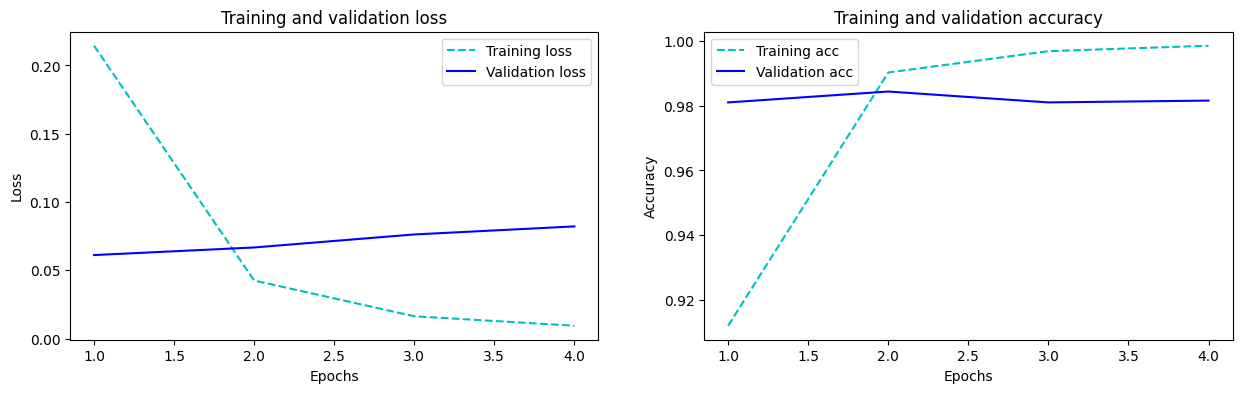

In [ ]:
fn.show_result(history_rnn_emm)

In [ ]:
rnn_emm.inputs[0]

<KerasTensor: shape=(None, 79) dtype=float32 (created by layer 'embedding_1_input')>

In [ ]:
rnn_emm.outputs[0]

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_3')>

- Convert tflite model

In [ ]:
run_model = tf.function(lambda x: rnn_emm(x))
# This is important, let's fix the input size.
BATCH_SIZE = 1
STEPS =79

concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE,STEPS], rnn_emm.inputs[0].dtype))


# model directory.
MODEL_DIR = "keras_rnn"
rnn_emm.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
tflite_model = converter.convert()
# Save the TensorFlow Lite model to a file
file = open('nlp_rnn_emm.tflite', 'wb')
file.write(tflite_model)
file.close()



In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='nlp_rnn_emm.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)

Input details: [{'name': 'serving_default_x:0', 'index': 0, 'shape': array([ 1, 79], dtype=int32), 'shape_signature': array([ 1, 79], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall:0', 'index': 31, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([1, 1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


- Check the saved Tflite model to see if it works efficiently

In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='nlp_rnn_emm.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


from sklearn.metrics import accuracy_score

# Initialize an empty list to store the predictions
predictions = []

# Iterate over each sample in the test dataset
for i in range(len(datatest)):
    # Get the input sequence for the current sample and convert it to FLOAT32
    input_sequence_float32 = datatest[i].reshape(1, -1).astype(np.float32)

    # Perform inference
    interpreter.set_tensor(input_details[0]['index'], input_sequence_float32)
    interpreter.invoke()

    # Get the output
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Convert output to binary prediction
    binary_prediction = (output_data > 0.5).astype(int)

    # Append the prediction to the list
    predictions.append(binary_prediction[0])

# accuracy for test data
accuracy2 = accuracy_score(labeltest, predictions)

# Print the accuracy for test data
print("Accuracy :", accuracy2)


Accuracy : 0.4


In [ ]:
# Display the predictions for each text
for i in range(len(datatest)):
    print("Text:", data_test['nltk'][i])
    print("True Label:", labeltest[i])
    print("Predicted Label:", predictions[i])
    print()


Text: beachwav use brows cart abandon remind boost engag revenu memori day sale strateg updat messag highlight final day get number entir site simpl yet effect chang emphas limitedtim natur offer creat great sens urgenc custom shop immedi take advantag deal expir
True Label: 0
Predicted Label: [1]

Text: sinc mani peopl eager await memori day sale shop summer cloth normal brand invit custom check late arriv ahead long holiday weekend messag come perfect time anyon consid buy new outfit annual barbecu outdoor gather come
True Label: 0
Predicted Label: [1]

Text: puriti coffe give audienc special mother day treat number sitewid plus free ship brand first announc sale sm earli may ensur peopl plenti time order continu promot midnight mother day send mix email sms remind send throughout sale period keep engag convers high
True Label: 0
Predicted Label: [1]

Text: make increas websit traffic around memori day dw home launch custom signup unit teas upcom offer captur new subscrib incentiv op

# BiLSTM


- Model Training

In [ ]:
bilstm_emm = Sequential()
bilstm_emm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
bilstm_emm.add(Bidirectional(LSTM(32, return_sequences=True)))
bilstm_emm.add(Dropout(0.5))
bilstm_emm.add(Bidirectional(LSTM(32)))
bilstm_emm.add(Dropout(0.5))
bilstm_emm.add(Dense(32, activation='relu'))
bilstm_emm.add(Dropout(0.5))
bilstm_emm.add(Dense(1, activation='sigmoid'))
bilstm_emm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
bilstm_emm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 79, 79)            471156    
                                                                 
 bidirectional (Bidirection  (None, 79, 64)            28672     
 al)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 79, 64)            0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)               

In [ ]:
history_bilstm_emm = bilstm_emm.fit(x_train, Y_train, epochs=20, batch_size=32,validation_data=(x_test, Y_test), callbacks=callbacks)

Epoch 1/20
224/224 [==============================] - 42s 146ms/step - loss: 0.1607 - acc: 0.9461 - val_loss: 0.0554 - val_acc: 0.9838
Epoch 2/20
224/224 [==============================] - 31s 137ms/step - loss: 0.0293 - acc: 0.9937 - val_loss: 0.0532 - val_acc: 0.9883
Epoch 3/20
224/224 [==============================] - 33s 148ms/step - loss: 0.0116 - acc: 0.9978 - val_loss: 0.0660 - val_acc: 0.9843
Epoch 4/20
224/224 [==============================] - 31s 138ms/step - loss: 0.0066 - acc: 0.9983 - val_loss: 0.0604 - val_acc: 0.9871
Epoch 5/20
224/224 [==============================] - 31s 137ms/step - loss: 0.0018 - acc: 0.9997 - val_loss: 0.0918 - val_acc: 0.9849
Epoch 5: early stopping


- Model Evaluation

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = bilstm_emm.evaluate(x_test, Y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')
print(f'Test loss: {test_loss * 100:.2f}%')

56/56 [==============================] - 2s 37ms/step - loss: 0.0532 - acc: 0.9883
Test accuracy: 98.83%
Test loss: 5.32%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
bilstm_emm.evaluate(x_test, Y_test)

y_pred3 = bilstm_emm.predict(x_test)
y_pred_binary3 = (y_pred3> 0.5).astype(int)

conf_matrix3 = confusion_matrix(Y_test, y_pred_binary3)
print("Confusion Matrix:")
print(conf_matrix3)

classification_rep3 = classification_report(Y_test, y_pred_binary3)
print("Classification Report:")
print(classification_rep3)

56/56 [==============================] - 3s 25ms/step
Confusion Matrix:
[[915   3]
 [ 18 852]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       918
           1       1.00      0.98      0.99       870

    accuracy                           0.99      1788
   macro avg       0.99      0.99      0.99      1788
weighted avg       0.99      0.99      0.99      1788



Last train accuracy: 0.9997202157974243
Last validation accuracy: 0.9848993420600891


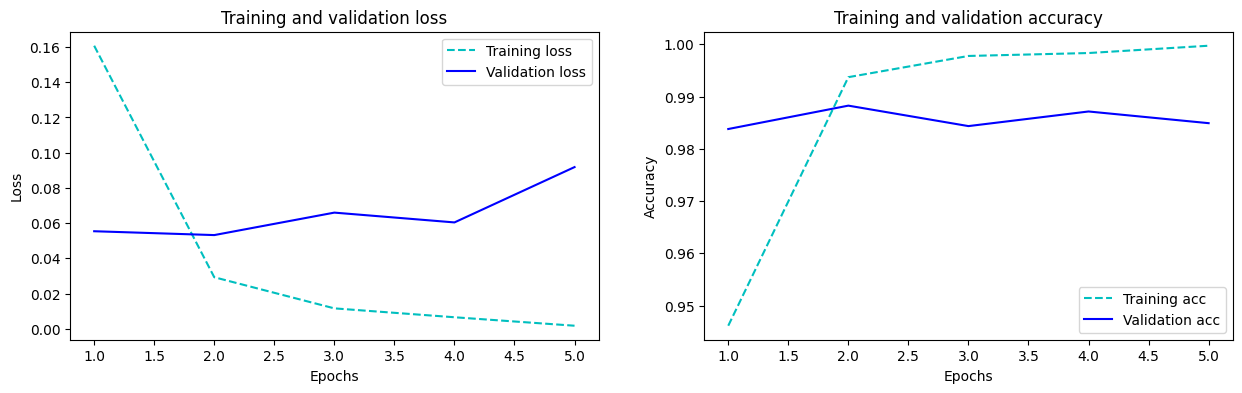

In [ ]:
fn.show_result(history_bilstm_emm)

In [ ]:
bilstm_emm.inputs[0]

<KerasTensor: shape=(None, 79) dtype=float32 (created by layer 'embedding_2_input')>

In [ ]:
bilstm_emm.outputs[0]

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_5')>

- Convert tflite model

In [ ]:
run_model = tf.function(lambda x: bilstm_emm(x))
# This is important, let's fix the input size.
BATCH_SIZE = 1
STEPS =79

concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE,STEPS], bilstm_emm.inputs[0].dtype))


# model directory.
MODEL_DIR = "keras_bilstm"
bilstm_emm.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
tflite_model = converter.convert()
# Save the TensorFlow Lite model to a file
file = open('nlp_bilstm_emm.tflite', 'wb')
file.write(tflite_model)
file.close()



In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='nlp_bilstm_emm.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)

Input details: [{'name': 'serving_default_x:0', 'index': 0, 'shape': array([ 1, 79], dtype=int32), 'shape_signature': array([ 1, 79], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall:0', 'index': 81, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([1, 1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


- Check the saved Tflite model to see if it works efficiently

In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='nlp_bilstm_emm.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


from sklearn.metrics import accuracy_score

# Initialize an empty list to store the predictions
predictions = []

# Iterate over each sample in the test dataset
for i in range(len(datatest)):
    # Get the input sequence for the current sample and convert it to FLOAT32
    input_sequence_float32 = datatest[i].reshape(1, -1).astype(np.float32)

    # Perform inference
    interpreter.set_tensor(input_details[0]['index'], input_sequence_float32)
    interpreter.invoke()

    # Get the output
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Convert output to binary prediction
    binary_prediction = (output_data > 0.5).astype(int)

    # Append the prediction to the list
    predictions.append(binary_prediction[0])

# accuracy for test data
accuracy3 = accuracy_score(labeltest, predictions)

# Print the accuracy for test data
print("Accuracy :", accuracy3)


Accuracy : 0.5


In [ ]:
# Display the predictions for each text
for i in range(len(datatest)):
    print("Text:", data_test['nltk'][i])
    print("True Label:", labeltest[i])
    print("Predicted Label:", predictions[i])
    print()


Text: beachwav use brows cart abandon remind boost engag revenu memori day sale strateg updat messag highlight final day get number entir site simpl yet effect chang emphas limitedtim natur offer creat great sens urgenc custom shop immedi take advantag deal expir
True Label: 0
Predicted Label: [0]

Text: sinc mani peopl eager await memori day sale shop summer cloth normal brand invit custom check late arriv ahead long holiday weekend messag come perfect time anyon consid buy new outfit annual barbecu outdoor gather come
True Label: 0
Predicted Label: [0]

Text: puriti coffe give audienc special mother day treat number sitewid plus free ship brand first announc sale sm earli may ensur peopl plenti time order continu promot midnight mother day send mix email sms remind send throughout sale period keep engag convers high
True Label: 0
Predicted Label: [0]

Text: make increas websit traffic around memori day dw home launch custom signup unit teas upcom offer captur new subscrib incentiv op

# CNN

- Model Training

In [ ]:
cnn_emm = Sequential()
cnn_emm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
cnn_emm.add(Conv1D(32, 5, activation='relu'))
cnn_emm.add(MaxPooling1D(2))
cnn_emm.add(Dropout(0.5))
cnn_emm.add(Conv1D(64, 5, activation='relu'))
cnn_emm.add(MaxPooling1D(2))
cnn_emm.add(Dropout(0.2))
cnn_emm.add(Conv1D(128, 5, activation='relu'))
cnn_emm.add(GlobalMaxPooling1D())
cnn_emm.add(Dropout(0.2))
cnn_emm.add(Flatten())
cnn_emm.add(Dense(64, activation='relu'))
cnn_emm.add(Dropout(0.5))
cnn_emm.add(Dense(1, activation='sigmoid'))
cnn_emm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
cnn_emm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 79, 79)            471156    
                                                                 
 conv1d (Conv1D)             (None, 75, 32)            12672     
                                                                 
 max_pooling1d (MaxPooling1  (None, 37, 32)            0         
 D)                                                              
                                                                 
 dropout_9 (Dropout)         (None, 37, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 33, 64)            10304     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 16, 64)            0         
 g1D)                                                 

In [ ]:
history_cnn_emm = cnn_emm.fit(x_train, Y_train, epochs=20, batch_size=32,validation_data=(x_test, Y_test), callbacks=callbacks)

Epoch 1/20
224/224 [==============================] - 9s 31ms/step - loss: 0.1784 - acc: 0.9243 - val_loss: 0.0614 - val_acc: 0.9855
Epoch 2/20
224/224 [==============================] - 6s 25ms/step - loss: 0.0415 - acc: 0.9892 - val_loss: 0.0497 - val_acc: 0.9860
Epoch 3/20
224/224 [==============================] - 7s 31ms/step - loss: 0.0240 - acc: 0.9944 - val_loss: 0.0505 - val_acc: 0.9866
Epoch 4/20
224/224 [==============================] - 6s 26ms/step - loss: 0.0164 - acc: 0.9959 - val_loss: 0.0621 - val_acc: 0.9843
Epoch 5/20
224/224 [==============================] - 7s 31ms/step - loss: 0.0116 - acc: 0.9973 - val_loss: 0.0802 - val_acc: 0.9849
Epoch 5: early stopping


- Model Evaluation

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = cnn_emm.evaluate(x_test, Y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')
print(f'Test loss: {test_loss * 100:.2f}%')

56/56 [==============================] - 0s 6ms/step - loss: 0.0497 - acc: 0.9860
Test accuracy: 98.60%
Test loss: 4.97%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred4 = cnn_emm.predict(x_test)
y_pred_binary4 = (y_pred4 > 0.5).astype(int)

conf_matrix4 = confusion_matrix(Y_test, y_pred_binary4)
print("Confusion Matrix:")
print(conf_matrix4)

classification_rep4 = classification_report(Y_test, y_pred_binary4)
print("Classification Report:")
print(classification_rep4)

56/56 [==============================] - 0s 5ms/step
Confusion Matrix:
[[911   7]
 [ 18 852]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       918
           1       0.99      0.98      0.99       870

    accuracy                           0.99      1788
   macro avg       0.99      0.99      0.99      1788
weighted avg       0.99      0.99      0.99      1788



Last train accuracy: 0.9973419308662415
Last validation accuracy: 0.9848993420600891


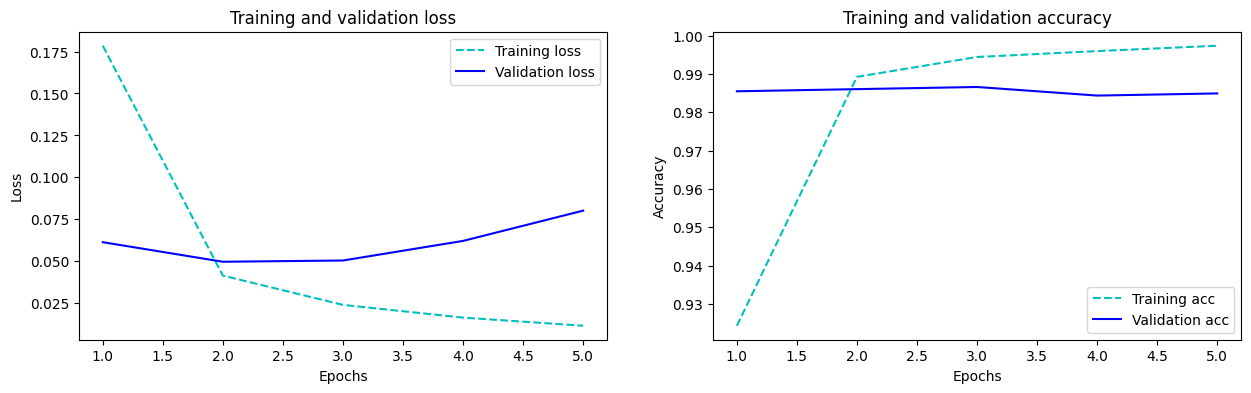

In [ ]:
fn.show_result(history_cnn_emm)

In [ ]:
cnn_emm.inputs[0]

<KerasTensor: shape=(None, 79) dtype=float32 (created by layer 'embedding_3_input')>

In [ ]:
cnn_emm.outputs[0]

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_7')>

- Convert tflite model

In [ ]:
run_model = tf.function(lambda x: cnn_emm(x))
# This is important, let's fix the input size.
BATCH_SIZE = 1
STEPS =79

concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE,STEPS], cnn_emm.inputs[0].dtype))


# model directory.
MODEL_DIR = "keras_cnn"
cnn_emm.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
tflite_model = converter.convert()
# Save the TensorFlow Lite model to a file
file = open('nlp_cnn_emm.tflite', 'wb')
file.write(tflite_model)
file.close()



In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='nlp_cnn_emm.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)

Input details: [{'name': 'serving_default_x:0', 'index': 0, 'shape': array([ 1, 79], dtype=int32), 'shape_signature': array([ 1, 79], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall:0', 'index': 35, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([1, 1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


- Check the saved Tflite model to see if it works efficiently

In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='nlp_cnn_emm.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


from sklearn.metrics import accuracy_score

# Initialize an empty list to store the predictions
predictions = []

# Iterate over each sample in the test dataset
for i in range(len(datatest)):
    # Get the input sequence for the current sample and convert it to FLOAT32
    input_sequence_float32 = datatest[i].reshape(1, -1).astype(np.float32)

    # Perform inference
    interpreter.set_tensor(input_details[0]['index'], input_sequence_float32)
    interpreter.invoke()

    # Get the output
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Convert output to binary prediction
    binary_prediction = (output_data > 0.5).astype(int)

    # Append the prediction to the list
    predictions.append(binary_prediction[0])

# accuracy for test data
accuracy4 = accuracy_score(labeltest, predictions)

# Print the accuracy for test data
print("Accuracy :", accuracy4)


Accuracy : 0.2


In [ ]:
# Display the predictions for each text
for i in range(len(datatest)):
    print("Text:", data_test['nltk'][i])
    print("True Label:", labeltest[i])
    print("Predicted Label:", predictions[i])
    print()


Text: beachwav use brows cart abandon remind boost engag revenu memori day sale strateg updat messag highlight final day get number entir site simpl yet effect chang emphas limitedtim natur offer creat great sens urgenc custom shop immedi take advantag deal expir
True Label: 0
Predicted Label: [1]

Text: sinc mani peopl eager await memori day sale shop summer cloth normal brand invit custom check late arriv ahead long holiday weekend messag come perfect time anyon consid buy new outfit annual barbecu outdoor gather come
True Label: 0
Predicted Label: [1]

Text: puriti coffe give audienc special mother day treat number sitewid plus free ship brand first announc sale sm earli may ensur peopl plenti time order continu promot midnight mother day send mix email sms remind send throughout sale period keep engag convers high
True Label: 0
Predicted Label: [1]

Text: make increas websit traffic around memori day dw home launch custom signup unit teas upcom offer captur new subscrib incentiv op

# GRU

- Model Training

In [ ]:
gru_emm = Sequential()
gru_emm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
gru_emm.add(GRU(32, return_sequences=True))
gru_emm.add(Dropout(0.5))
gru_emm.add(GRU(32))
gru_emm.add(Dropout(0.5))
gru_emm.add(Dense(32, activation='relu'))
gru_emm.add(Dropout(0.5))
gru_emm.add(Dense(1, activation='sigmoid'))

gru_emm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
gru_emm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 79, 79)            471156    
                                                                 
 gru (GRU)                   (None, 79, 32)            10848     
                                                                 
 dropout_13 (Dropout)        (None, 79, 32)            0         
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dropout_15 (Dropout)        (None, 32)               

In [ ]:
history_gru_emm = gru_emm.fit(x_train, Y_train, epochs=20, batch_size=32,validation_data=(x_test, Y_test), callbacks=callbacks)

Epoch 1/20
224/224 [==============================] - 25s 93ms/step - loss: 0.1470 - acc: 0.9645 - val_loss: 0.0450 - val_acc: 0.9821
Epoch 2/20
224/224 [==============================] - 18s 81ms/step - loss: 0.0264 - acc: 0.9944 - val_loss: 0.0533 - val_acc: 0.9849
Epoch 3/20
224/224 [==============================] - 20s 88ms/step - loss: 0.0075 - acc: 0.9986 - val_loss: 0.0714 - val_acc: 0.9838
Epoch 4/20
224/224 [==============================] - 20s 88ms/step - loss: 0.0032 - acc: 0.9994 - val_loss: 0.0929 - val_acc: 0.9827
Epoch 4: early stopping


- Model Evaluation

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = gru_emm.evaluate(x_test, Y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')
print(f'Test loss: {test_loss * 100:.2f}%')

56/56 [==============================] - 1s 17ms/step - loss: 0.0450 - acc: 0.9821
Test accuracy: 98.21%
Test loss: 4.50%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred5 = gru_emm.predict(x_test)
y_pred_binary5 = (y_pred5 > 0.5).astype(int)

conf_matrix5 = confusion_matrix(Y_test, y_pred_binary5)
print("Confusion Matrix:")
print(conf_matrix5)

classification_rep5 = classification_report(Y_test, y_pred_binary5)
print("Classification Report:")
print(classification_rep5)

56/56 [==============================] - 2s 16ms/step
Confusion Matrix:
[[898  20]
 [ 12 858]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       918
           1       0.98      0.99      0.98       870

    accuracy                           0.98      1788
   macro avg       0.98      0.98      0.98      1788
weighted avg       0.98      0.98      0.98      1788



Last train accuracy: 0.9994404315948486
Last validation accuracy: 0.9826622009277344


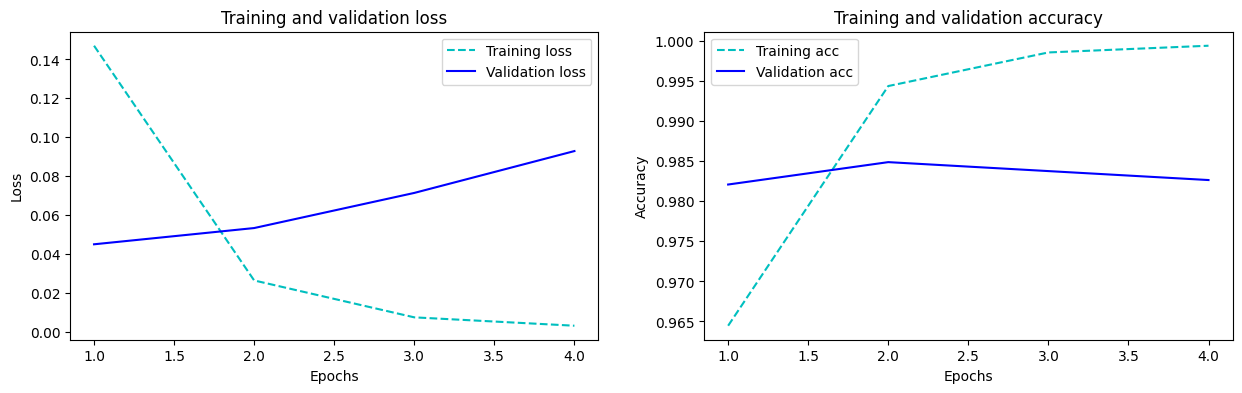

In [ ]:
fn.show_result(history_gru_emm)

In [ ]:
gru_emm.inputs[0]

<KerasTensor: shape=(None, 79) dtype=float32 (created by layer 'embedding_4_input')>

In [ ]:
gru_emm.outputs[0]

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_9')>

- Convert tflite model

In [ ]:
run_model = tf.function(lambda x: gru_emm(x))
# This is important, let's fix the input size.
BATCH_SIZE = 1
STEPS =79

concrete_func = run_model.get_concrete_function(
    tf.TensorSpec([BATCH_SIZE,STEPS], gru_emm.inputs[0].dtype))


# model directory.
MODEL_DIR = "keras_gru"
gru_emm.save(MODEL_DIR, save_format="tf", signatures=concrete_func)

converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_DIR)
tflite_model = converter.convert()
# Save the TensorFlow Lite model to a file
file = open('nlp_gru_emm.tflite', 'wb')
file.write(tflite_model)
file.close()



In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='nlp_gru_emm.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input details:", input_details)
print("Output details:", output_details)

Input details: [{'name': 'serving_default_x:0', 'index': 0, 'shape': array([ 1, 79], dtype=int32), 'shape_signature': array([ 1, 79], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall:0', 'index': 35, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([1, 1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


- Check the saved Tflite model to see if it works efficiently

In [ ]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='nlp_gru_emm.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


from sklearn.metrics import accuracy_score

# Initialize an empty list to store the predictions
predictions = []

# Iterate over each sample in the test dataset
for i in range(len(datatest)):
    # Get the input sequence for the current sample and convert it to FLOAT32
    input_sequence_float32 = datatest[i].reshape(1, -1).astype(np.float32)

    # Perform inference
    interpreter.set_tensor(input_details[0]['index'], input_sequence_float32)
    interpreter.invoke()

    # Get the output
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Convert output to binary prediction
    binary_prediction = (output_data > 0.5).astype(int)

    # Append the prediction to the list
    predictions.append(binary_prediction[0])

# accuracy for test data
accuracy5 = accuracy_score(labeltest, predictions)

# Print the accuracy for test data
print("Accuracy :", accuracy5)


Accuracy : 0.7


In [ ]:
# Display the predictions for each text
for i in range(len(data_test)):
    print("Text:", data_test['nltk'][i])
    print("True Label:", labeltest[i])
    print("Predicted Label:", predictions[i])
    print()


Text: beachwav use brows cart abandon remind boost engag revenu memori day sale strateg updat messag highlight final day get number entir site simpl yet effect chang emphas limitedtim natur offer creat great sens urgenc custom shop immedi take advantag deal expir
True Label: 0
Predicted Label: [0]

Text: sinc mani peopl eager await memori day sale shop summer cloth normal brand invit custom check late arriv ahead long holiday weekend messag come perfect time anyon consid buy new outfit annual barbecu outdoor gather come
True Label: 0
Predicted Label: [0]

Text: puriti coffe give audienc special mother day treat number sitewid plus free ship brand first announc sale sm earli may ensur peopl plenti time order continu promot midnight mother day send mix email sms remind send throughout sale period keep engag convers high
True Label: 0
Predicted Label: [0]

Text: make increas websit traffic around memori day dw home launch custom signup unit teas upcom offer captur new subscrib incentiv op

# BERT

In [18]:
!pip install tensorflow-text==2.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 17.9 MB/s eta 0:00:00


In [19]:
import tensorflow_hub as hub
import tensorflow_text as text


- Model Training

In [20]:
# loading train test split
from sklearn.model_selection import train_test_split
X_train1, X_test1 , y_train1, y_test1 = train_test_split(final_df['nltk'], final_df['label'],
                                                    stratify = final_df['label'])

In [21]:
# downloading preprocessing files and model
bert_preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [22]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='inputs')

preprocessed_text = bert_preprocessor(text_input)
embeed = bert_encoder(preprocessed_text)
dropout = tf.keras.layers.Dropout(0.1, name = 'Dropout')(embeed['pooled_output'])
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'Dense')(dropout)
# creating final model
bert_emm = tf.keras.Model(inputs = [text_input], outputs = [outputs])

In [23]:
# compiling our model
bert_emm.compile(optimizer ='adam',
               loss = 'binary_crossentropy',
                metrics=['acc'])

In [24]:
# check the summary of the model
bert_emm.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_type_ids': (None,    0         ['inputs[0][0]']              
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                              

In [25]:
# Replace missing values with an empty string
X_train1 = X_train1.fillna('')
X_test1 = X_test1.fillna('')




In [26]:
history_bert_emm = bert_emm.fit(X_train1, y_train1, epochs=20, batch_size=32,validation_data=(X_test1, y_test1), callbacks=callbacks)

Epoch 1/20
168/168 [==============================] - 90s 463ms/step - loss: 0.2949 - acc: 0.8843 - val_loss: 0.1980 - val_acc: 0.9292
Epoch 2/20
168/168 [==============================] - 77s 461ms/step - loss: 0.1909 - acc: 0.9314 - val_loss: 0.1471 - val_acc: 0.9500
Epoch 3/20
168/168 [==============================] - 77s 457ms/step - loss: 0.1554 - acc: 0.9461 - val_loss: 0.1278 - val_acc: 0.9530
Epoch 4/20
168/168 [==============================] - 70s 418ms/step - loss: 0.1397 - acc: 0.9493 - val_loss: 0.1264 - val_acc: 0.9560
Epoch 5/20
168/168 [==============================] - 77s 457ms/step - loss: 0.1299 - acc: 0.9528 - val_loss: 0.1096 - val_acc: 0.9620
Epoch 6/20
168/168 [==============================] - 77s 456ms/step - loss: 0.1231 - acc: 0.9550 - val_loss: 0.1065 - val_acc: 0.9657
Epoch 7/20
168/168 [==============================] - 70s 417ms/step - loss: 0.1132 - acc: 0.9597 - val_loss: 0.0993 - val_acc: 0.9612
Epoch 8/20
168/168 [==============================] - 7

- Model Evaluation

In [27]:
# Evaluate the model on the test set
classification_metrics = bert_emm.evaluate(X_test1,y_test1)

test_loss = classification_metrics[0]
test_acc = classification_metrics[1]

print(f'Test accuracy: {test_acc * 100:.2f}%')
print(f'Test loss: {test_loss * 100:.2f}%')

70/70 [==============================] - 23s 332ms/step - loss: 0.0806 - acc: 0.9727
Test accuracy: 97.27%
Test loss: 8.06%


Last train accuracy: 0.9682894945144653
Last validation accuracy: 0.9731543660163879


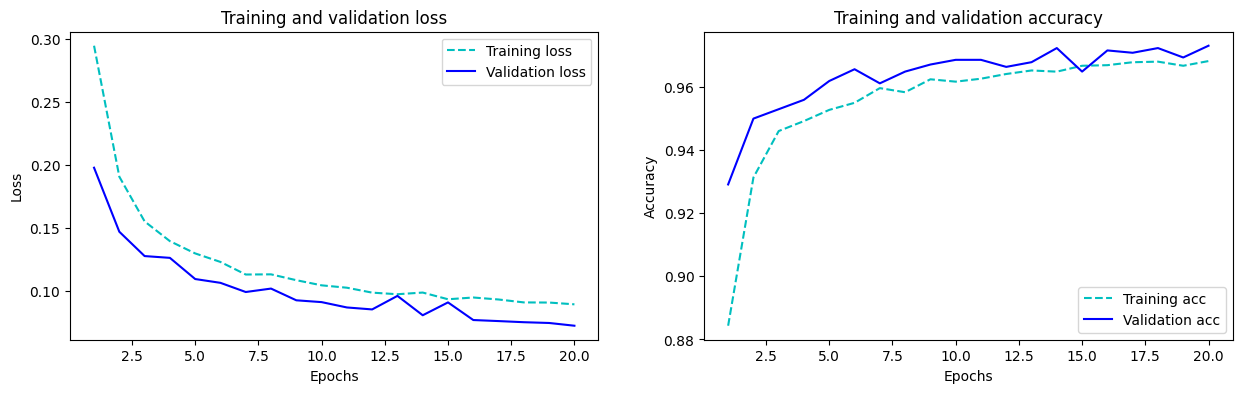

In [28]:
fn.show_result(history_bert_emm)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred6 = bert_emm.predict(X_test1)
y_pred_binary6 = (y_pred6 > 0.5).astype(int)

conf_matrix6 = confusion_matrix(y_test1, y_pred_binary6)
print("Confusion Matrix:")
print(conf_matrix6)

classification_rep6 = classification_report(y_test1, y_pred_binary6)
print("Classification Report:")
print(classification_rep6)

70/70 [==============================] - 24s 334ms/step
Confusion Matrix:
[[1096   21]
 [  40 1077]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1117
           1       0.98      0.96      0.97      1117

    accuracy                           0.97      2234
   macro avg       0.97      0.97      0.97      2234
weighted avg       0.97      0.97      0.97      2234



- Save Model

In [31]:
bert_emm.save('nlp_bert_emm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
